# Electron Neutrino Efficiency vs. Energy

This notebook estimates the electron neutrino efficiency as a function of energy. The notebook compares a high-rate trigger and a low-rate one, as well as a cut-off trigger versus an adaptive trigger. The data used for this analysis comes from the simulation 'sim_100gev_10pev_cascades/electron'.

In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import statistics
import math
from matplotlib.ticker import MultipleLocator
import random
from tqdm import tqdm
import matplotlib

In [2]:
f = open('probabilities.pkl','rb')
probs = pkl.load(f)
f.close()
efficiency               = probs['eff']
efficiency_error         = probs['eff_error']
adaptive_probability= probs['adaptive']
adaptive_probability_err = probs['adaptive_error']
zero                     = probs['zero']
zero_error               = probs['zero_error']

In [329]:
adaptive_probability.keys()

dict_keys([21.544346900318832, 2154.4346900318824])

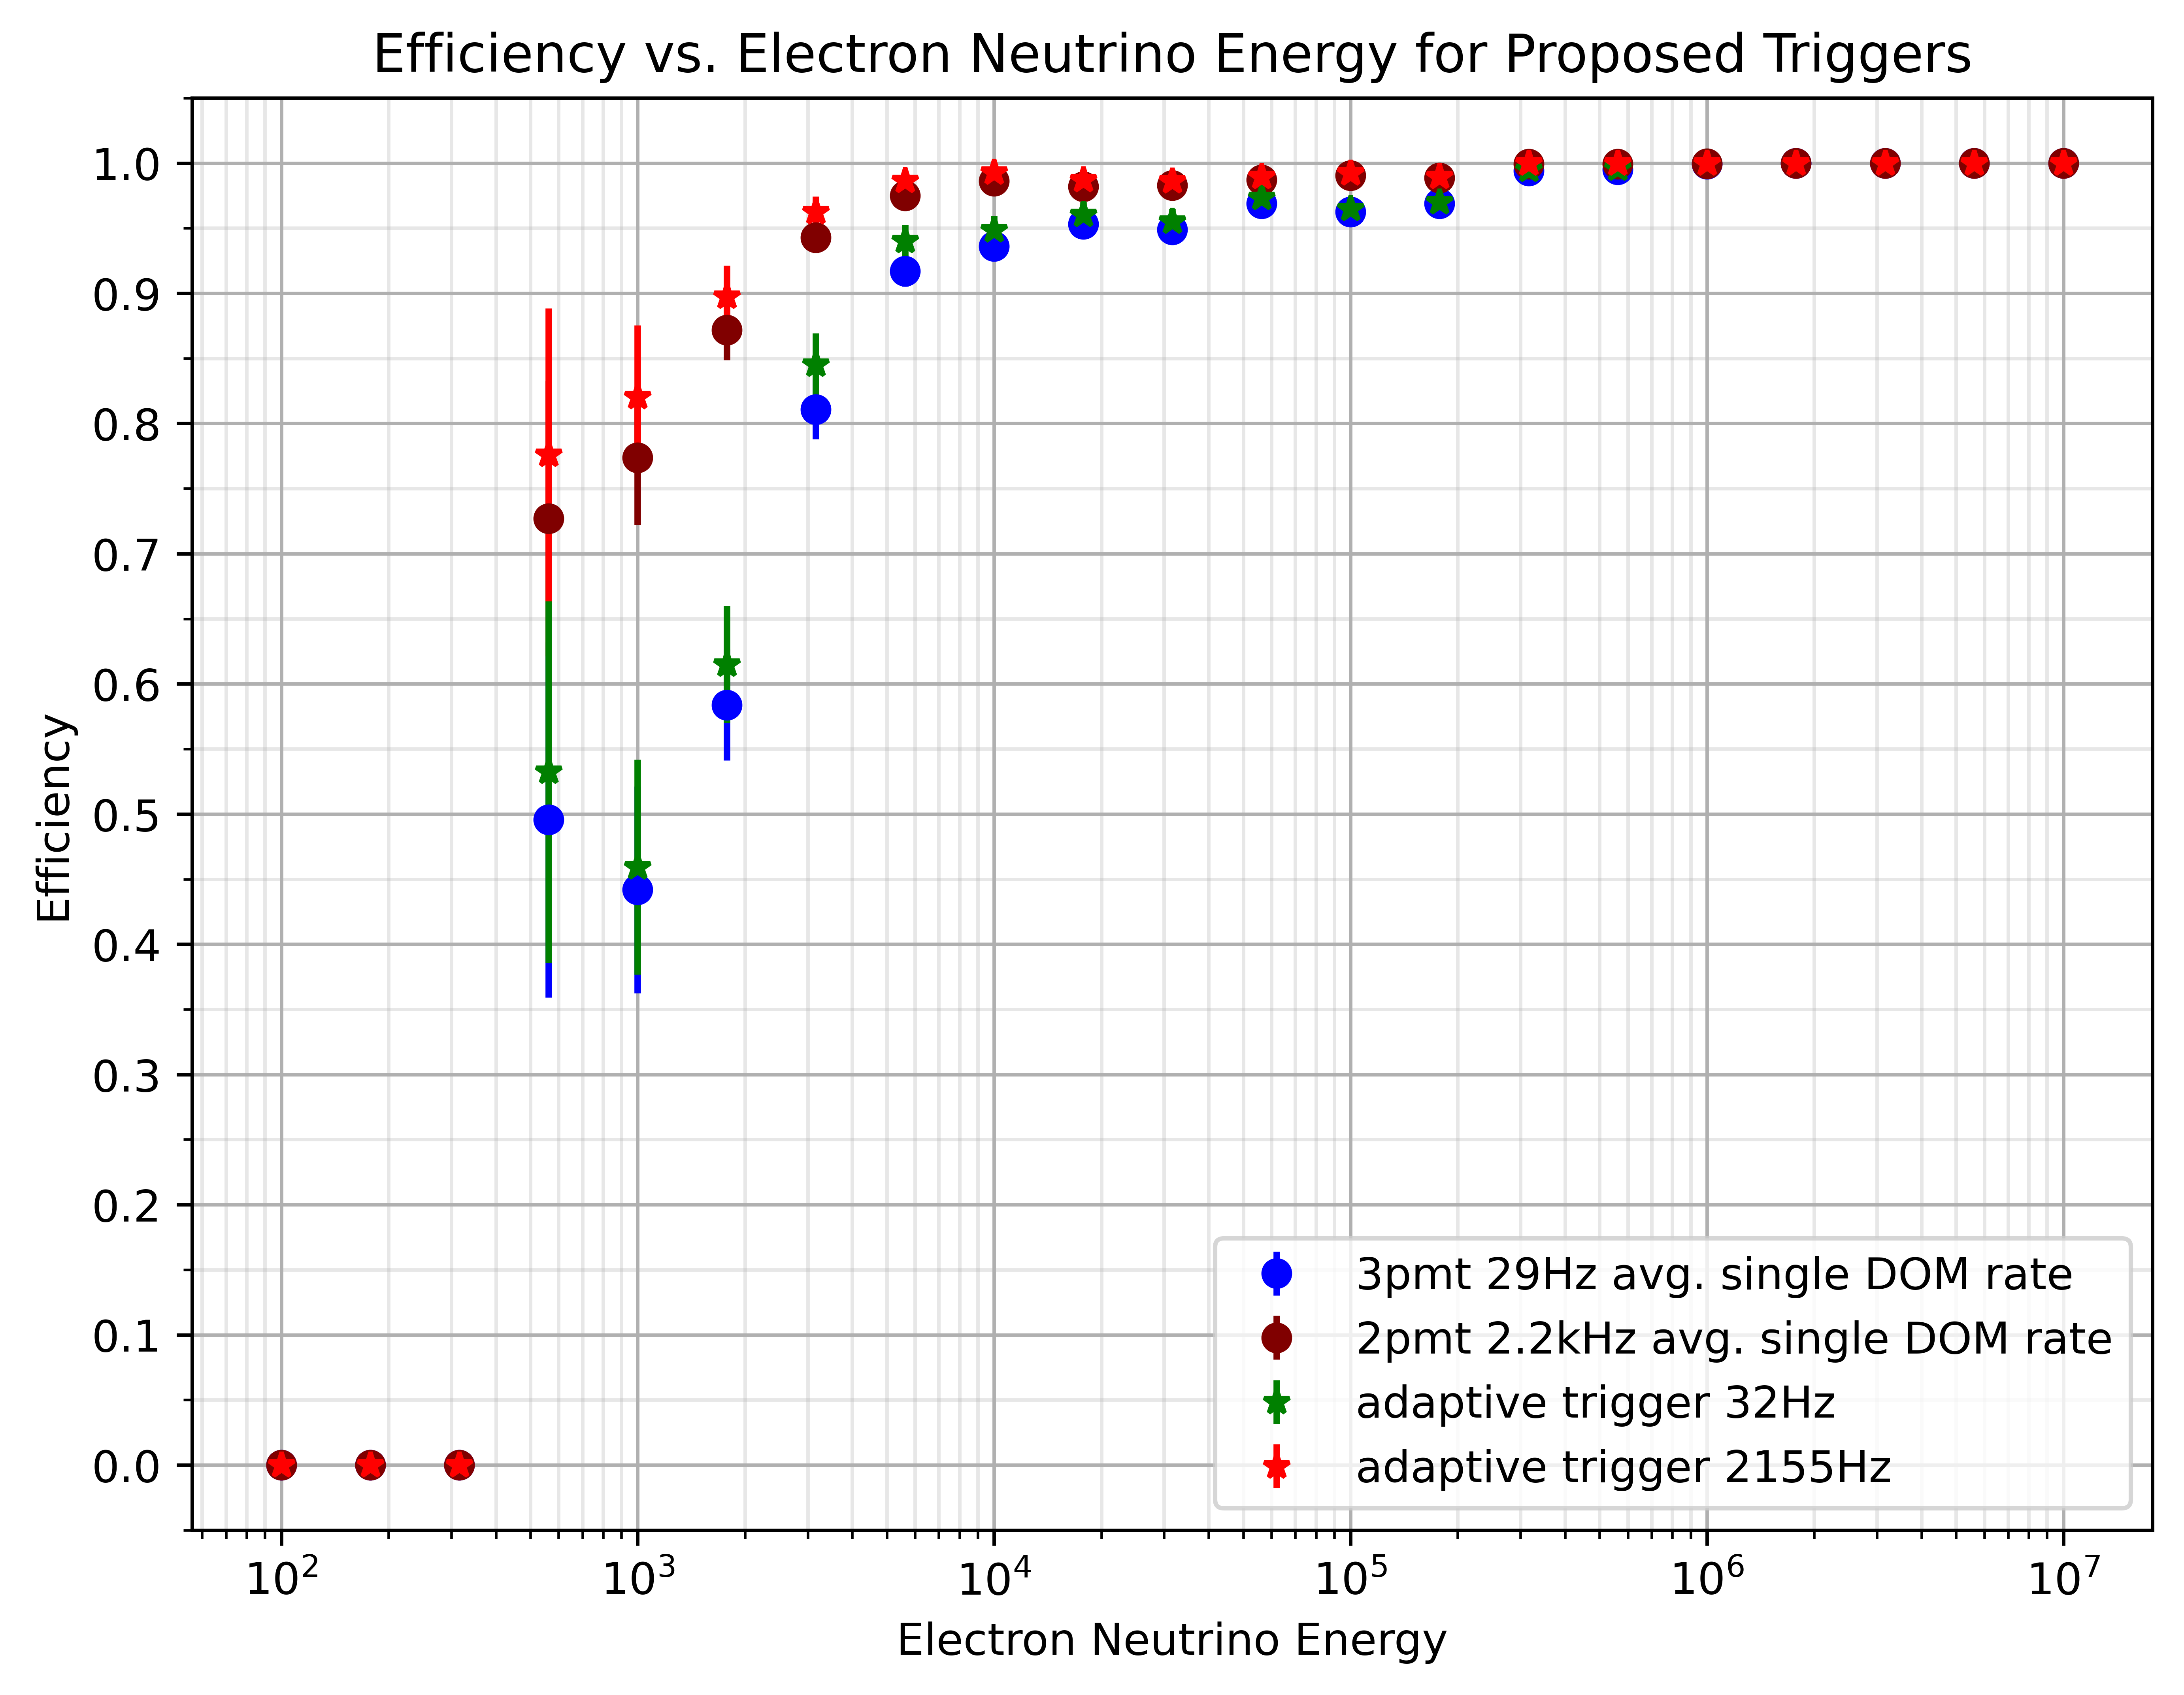

In [3]:
plt.figure(figsize=(8,6),dpi=800)
color = {31.622776601683793:'green',2154.4346900318824:'red'}
plt.errorbar(zero[3].keys(),zero[3].values(),yerr=zero_error[3].values(),fmt='o',label='3pmt 29Hz avg. single DOM rate',color='blue')
plt.errorbar(zero[2].keys(),zero[2].values(),yerr=zero_error[2].values(),fmt='o',label='2pmt 2.2kHz avg. single DOM rate',color='maroon')
for i in adaptive_probability:
    plt.errorbar(adaptive_probability[i].keys(),adaptive_probability[i].values(),
             yerr=adaptive_probability_err[i].values(),fmt='*',label='adaptive trigger '+str(math.ceil(i))+'Hz',color=color[i])

plt.xscale('log')
#plt.yscale('log')
#plt.ylim([10e-1,10e6])
plt.xlabel('Electron Neutrino Energy')
plt.ylabel('Efficiency')
#plt.xlim([10e-1,10e6])
plt.legend()
plt.gca().yaxis.set_minor_locator(MultipleLocator(0.05))

plt.gca().yaxis.set_major_locator(MultipleLocator(0.1))
plt.grid()
plt.grid(which='minor',alpha=0.3)
plt.title('Efficiency vs. Electron Neutrino Energy for Proposed Triggers')
plt.savefig('electron_neutrino_energy.jpg',dpi = 800,bbox_inches='tight')

In [201]:
f = open('distance_energy.pkl','rb')
neutrino = pkl.load(f)
f.close()

In [326]:
energy1 = []
source1 = []
energy3 = []
source3 = []
for i in range(len(neutrino['event'])):
    r = np.sqrt(neutrino['source'][i][0]**2+neutrino['source'][i][1]**2)
    z = neutrino['source'][i][2]
    if r > 160 and z <= 500:
        energy1.append(neutrino['energy'][i])
        source1.append(np.sqrt((r-160)**2))
        if 3 in neutrino['event'][i]:
            energy3.append(neutrino['energy'][i])
            source3.append(np.sqrt((r-160)**2))
    elif r <= 160 and z > 500:
        energy1.append(neutrino['energy'][i])
        source1.append(np.sqrt((z-500)**2))
        if 3 in neutrino['event'][i]:
            energy3.append(neutrino['energy'][i])
            source3.append(np.sqrt((z-500)**2))
    elif r > 160 and z > 500:
        energy1.append(neutrino['energy'][i])
        source1.append(np.sqrt((r-160)**2+(z-500)**2))
        if 3 in neutrino['event'][i]:
            energy3.append(neutrino['energy'][i])
            source3.append(np.sqrt((r-160)**2+(z-500)**2))
    else:
        continue
        
        
    

In [327]:
energy_bins = np.logspace(np.log10(100),np.log10(10000000),21)
distance_bins = np.linspace(min(source1),max(source1),31)
plt.figure(figsize=(24,6),dpi=800)
plt.subplot(131)
hist1,_,_=np.histogram2d(energy1,source1,bins=[energy_bins,distance_bins])
h1=plt.hist2d(energy1,source1,bins=[energy_bins,distance_bins])
plt.xscale('log')
plt.subplot(132)
hist3,_,_=np.histogram2d(energy3,source3,bins=[energy_bins,distance_bins])
h3=plt.hist2d(energy3,source3,bins=[energy_bins,distance_bins])
plt.xscale('log')
ratio = []
for i in range(len(h1[0])):
    r= []
    for j in range(len(h1[0][i])):
        if h1[0][i][j] == 0:
            r.append(0)
        else:
            r.append(h3[0][i][j]/h1[0][i][j])
    ratio.append(r)
ratio = np.rot90(ratio,k=1)
plt.subplot(133)
plt.imshow(ratio, cmap='inferno',
           extent=[2, 7, min(h1[2]), max(h1[2])],           
          origin='upper', aspect='auto')
plt.colorbar()